In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv('Mall_Customers.csv')
print("Dataset Preview:")
print(data.head())

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)
print("\nStandardized Data Preview:")
print(X_scaled.head())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Standardized Data Preview:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


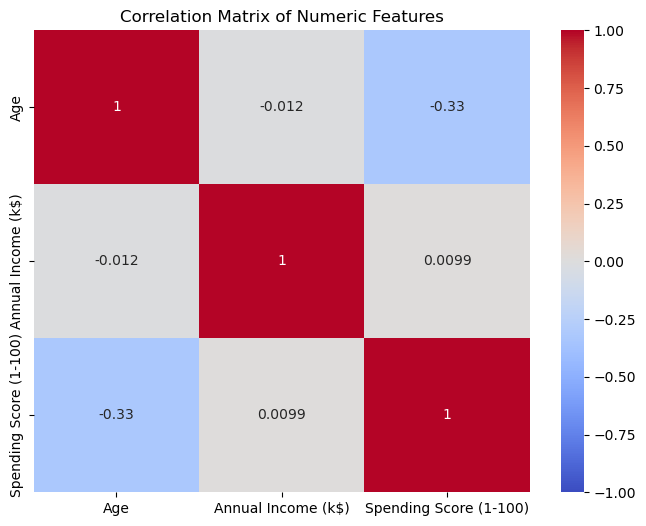

In [3]:
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

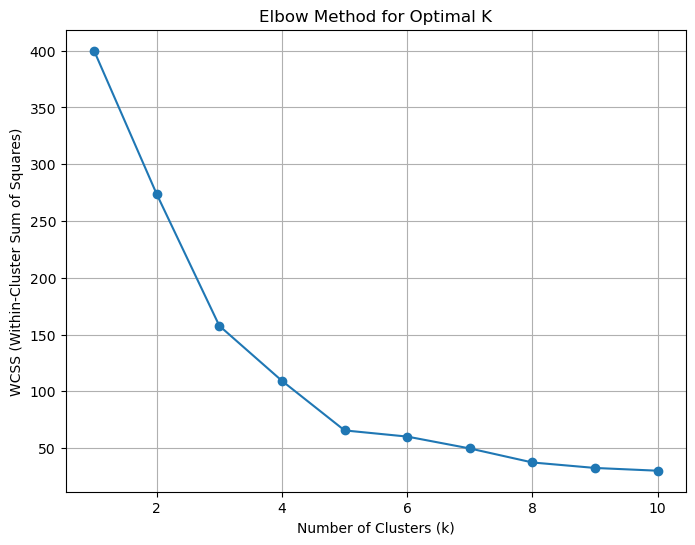

Selected k for clustering: 3


In [4]:
X_elbow = X_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_elbow)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

optimal_k = 3
print(f"Selected k for clustering: {optimal_k}")

In [6]:
pairs = [
    ('Age', 'Annual Income (k$)'),
    ('Age', 'Spending Score (1-100)'),
    ('Annual Income (k$)', 'Spending Score (1-100)')
]

cluster_results = {}

for x_col, y_col in pairs:
    X_pair = X[[x_col, y_col]]
    scaler_pair = StandardScaler()
    X_pair_scaled = scaler_pair.fit_transform(X_pair)
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pair_scaled)
    cluster_results[(x_col, y_col)] = {
        'labels': labels,
        'centroids': scaler_pair.inverse_transform(kmeans.cluster_centers_),
        'inertia': kmeans.inertia_
    }
    print(f"\nDistortion for {x_col} vs {y_col}: {kmeans.inertia_:.2f}")

for (x_col, y_col), result in cluster_results.items():
    print(f"\nCluster counts for {x_col} vs {y_col}:")
    print(pd.Series(result['labels']).value_counts())

c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Miniconda3\envs\env01\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Distortion for Age vs Annual Income (k$): 132.86

Distortion for Age vs Spending Score (1-100): 124.33

Distortion for Annual Income (k$) vs Spending Score (1-100): 157.70

Cluster counts for Age vs Annual Income (k$):
0    76
1    62
2    62
Name: count, dtype: int64

Cluster counts for Age vs Spending Score (1-100):
0    84
1    62
2    54
Name: count, dtype: int64

Cluster counts for Annual Income (k$) vs Spending Score (1-100):
2    123
1     39
0     38
Name: count, dtype: int64
